In [1]:
#Importing all libraries
import numpy as np
import matplotlib.pyplot as plt
import heapq
import tqdm as tqdm

In [2]:
#Initialization of position and velocities
def initialize(N, L, temperature):
    positions = np.linspace(0.2 * L, 0.8 * L, N)
    velocities = np.random.normal(loc=0.0, scale=np.sqrt(temperature), size=N)
    # print(positions)
    # print(velocities)
    return positions, velocities

In [3]:
#Nex Collision
def next_collision(positions, velocities, N, L):
    event_queue = []
    for i in range(N):
        for j in range(i + 1, N):
            if velocities[i] != velocities[j]:
                dt = (positions[j] - positions[i]) / (velocities[i] - velocities[j])
                if dt > 0:
                    heapq.heappush(event_queue, (dt, i, j))
        # Wall collisions
    if velocities[N-1] > 0:
      heapq.heappush(event_queue, (((L - positions[N-1]) / velocities[N-1]) , N-1, 'right_wall'))
    if velocities[0] < 0:
      heapq.heappush(event_queue, ((positions[0] / abs(velocities[0])) , 0, 'left_wall'))
    # print("Next set of collisions lined up are: ")
    # print(event_queue)
    return event_queue

In [4]:
# print(next_collision(positions,velocities,50,100.0))

In [5]:
def update_positions(positions, velocities, dt):

    return positions + velocities * dt

# Function to perform a single realization
def perform_realization(N, L, particle_index, num_steps, time_step, temp):
    # print("initial positions and velocities:")
    positions, velocities = initialize(N, L, temp)
    initial_position = positions[particle_index]
    current_time = 0
    event_queue = next_collision(positions, velocities, N, L)
    msd = np.zeros(num_steps)
    for step in range(num_steps):
        while current_time < (step+1) * time_step:
            # print(f"Current time is: {current_time}")
            dt, i, j = heapq.heappop(event_queue)
            current_time +=dt
            # print(f"Next Collision occurs between {i} & {j}, at {current_time}")
            positions = update_positions(positions,velocities,dt)
            if isinstance(j, str):  # Wall collision
                # print("Wall collision occurs")
                # print(j)
                velocities[i] *= -1
            else:  # Particle collision
                velocities[i], velocities[j] = velocities[j], velocities[i]

            event_queue = next_collision(positions,velocities,N,L)

        msd[step] = (positions[particle_index] - initial_position)**2

    return msd

MSD of particles at constant densities and varying temperature


Loading...: 100%|██████████| 200/200 [22:09<00:00,  6.65s/it]


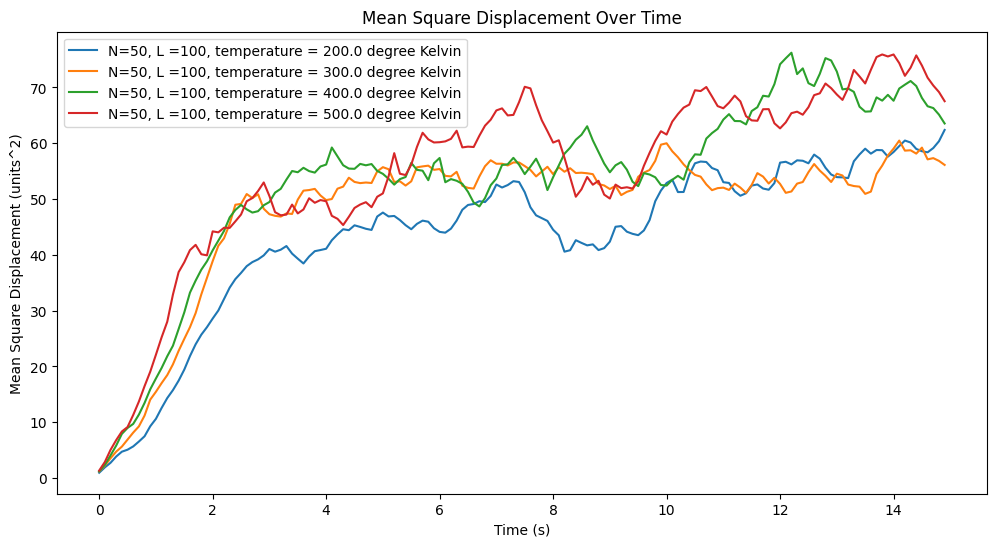

In [14]:
TEMP = [200.0,300.0,400.0,500.0]
L = 100 # Box lengths
N = 50
num_realizations = 200
num_steps = 150
time_step = 0.1
particle_indices = 24
from tqdm import tqdm
plt.figure(figsize=(12, 6))
plt.title("Mean Square Displacement Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Mean Square Displacement (units^2)")
# for j in range(len(temperatures)):
#   print(f"Carrying Out simulations at a constant density at temperatrue {temperatures[j]} Kelvin")
for temp in range(len(TEMP)):
    msd_avg = np.zeros(num_steps)
    for i in tqdm (range (num_realizations), desc="Loading..."):
        # print(f"currently conducting simulations for {realization} for {sim} particle")
        msd = perform_realization(N, L, particle_indices, num_steps, time_step, TEMP[temp])
        # for msds in msd:
        #   if msds>=40000.0:
        #     print("Reached Wall")
        msd_avg += msd
    msd_avg /= num_realizations
    plt.plot(np.arange(num_steps) * time_step, msd_avg, label=f"N={N}, L ={L}, temperature = {TEMP[temp]} degree Kelvin")
plt.legend()
plt.show()